<a href="https://colab.research.google.com/github/kohatu12/ggl_prices_project/blob/main/open_data_ggl_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Загрузка библиотек и данных.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import r2_score, mean_squared_error, classification_report, confusion_matrix, accuracy_score
from pylab import rcParams
from sklearn.linear_model import LinearRegression

Загрузка и первичная обработка данных

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/GOOGLe prices.csv")
num_cols = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]
for col in num_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace(",", ".")
        df[col] = pd.to_numeric(df[col], errors="coerce")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.sort_values('Date').dropna(subset=['Date']).reset_index(drop=True)
df.dropna(subset=num_cols, how='all', inplace=True)

print("\nПропущенные значения в фрейме данных:")
print(df.isnull())
df.dropna(how='all', inplace=True)
print(df.dtypes)
print(df. head())


Пропущенные значения в фрейме данных:
       Date   Open   High    Low  Close  Adj Close  Volume
0     False  False  False  False  False      False   False
1     False  False  False  False  False      False   False
2     False  False  False  False  False      False   False
3     False  False  False  False  False      False   False
4     False  False  False  False  False      False   False
...     ...    ...    ...    ...    ...        ...     ...
5113  False  False  False  False  False      False   False
5114  False  False  False  False  False      False   False
5115  False  False  False  False  False      False   False
5116  False  False  False  False  False      False   False
5117  False  False  False  False  False      False   False

[5118 rows x 7 columns]
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object
        Date      

Далее была проведена проверка строк на ячейки, где встречаются
значения 0.0. Отфильтрованный фрейм сохраняется в csv-файл, а после
проводится повторная фильтрация. По итогу строки, где встречаются значения
0.0 не были найдены.



In [ ]:
zero_cap_rows = df[~df.isin(['0.0']).any(axis=1)].index
print("Номера строк, где встречаются значения 0.0:")
print(zero_cap_rows)
df[~df.isin(['0.0']).any(axis=1)]
df.to_csv('Filtered.csv', index=False)
df_filtered = pd.read_csv('Filtered.csv', sep=",", decimal=".")
zero_cap_rows = df_filtered[~df_filtered.isin(["0.0"]).any(axis=1)].index
print("Номера строк, где встречаются значения 0.0:")
print(zero_cap_rows)

Номера строк, где встречаются значения 0.0:
RangeIndex(start=0, stop=5118, step=1)
Номера строк, где встречаются значения 0.0:
RangeIndex(start=0, stop=5118, step=1)


Вывод статистики.

In [ ]:
describe_df = df_filtered.describe()
print(df_filtered.dtypes)
print(describe_df)
print(df_filtered)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
              Open         High          Low        Close    Adj Close  \
count  5118.000000  5118.000000  5118.000000  5118.000000  5118.000000   
mean     47.639701    48.139771    47.149358    47.654613    47.490963   
std      45.736050    46.241037    45.269941    45.763431    45.621100   
min       2.482232     2.546046     2.401401     2.502753     2.493713   
25%      13.176239    13.307683    13.039790    13.182808    13.135192   
50%      28.003501    28.195346    27.751500    27.969750    27.868724   
75%      62.746125    63.414874    62.220124    62.900626    62.673431   
max     197.250000   201.419998   194.979996   196.660004   196.660004   

             Volume  
count  5.118000e+03  
mean   1.157640e+08  
std    1.470189e+08  
min    9.312000e+06  
25%    3.064900e+07  
50%    5.752321e+07  
75%    1.393135e+0

Вывод трех графиков: обычная гистограмма (цена закрытия/дата), распределение данных при помощи линейной регрессии,

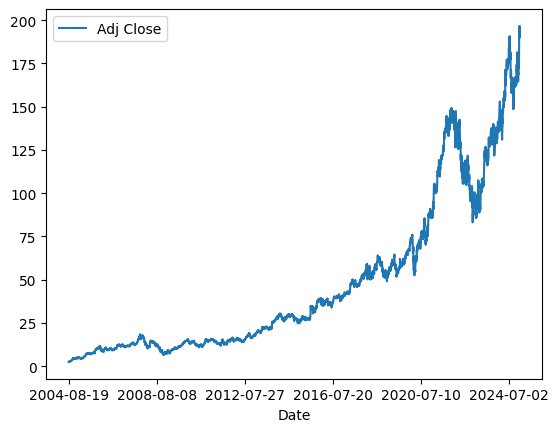

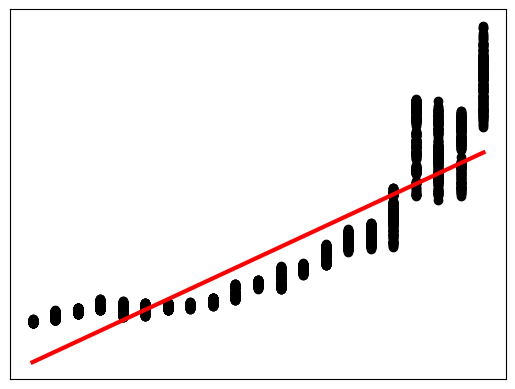

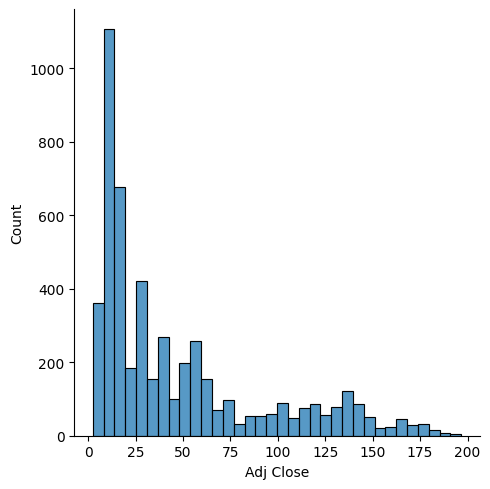

In [ ]:
#вывод первого графика
df_filtered.plot(x="Date", y="Adj Close")
plt.show()

#подготовка данных для линейной регресиии
data1 = df_filtered.iloc[:, 0]
data1 = data1.str[:4].astype(float)
data2 = df_filtered.iloc[:, 5]
data1 = data1.to_numpy().reshape(-1, 1)
data1 = np.array(data1)
data2 = np.array(data2)

#линейная регрессия
x = data1
y = data2
regr = linear_model.LinearRegression()
regr.fit(x, y)

#вывод графика распределения данных при помощи линейной регрессии
plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='red', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()


sns_plot = sns.displot(df_filtered['Adj Close'])
fig = sns_plot._figure
fig.savefig('facet_plot.png')
plt.show()


Корреляционный анализ

               Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999912  0.999903  0.999796   0.999795 -0.455516
High       0.999912  1.000000  0.999892  0.999905   0.999904 -0.454678
Low        0.999903  0.999892  1.000000  0.999917   0.999916 -0.456546
Close      0.999796  0.999905  0.999917  1.000000   0.999999 -0.455724
Adj Close  0.999795  0.999904  0.999916  0.999999   1.000000 -0.455606
Volume    -0.455516 -0.454678 -0.456546 -0.455724  -0.455606  1.000000


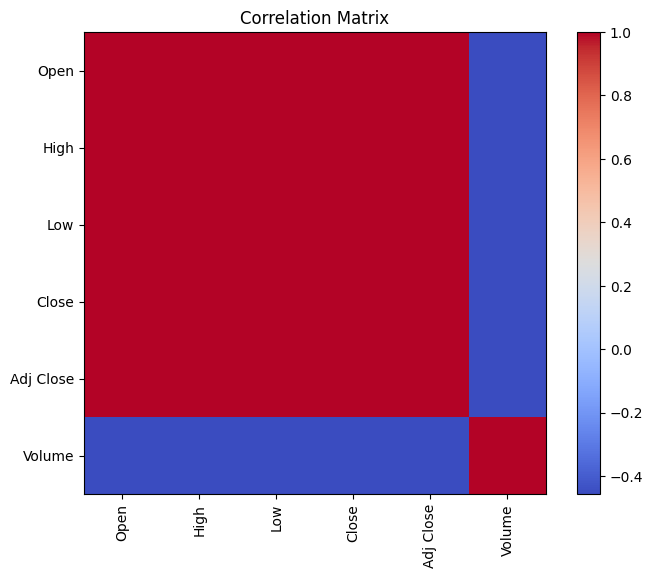

In [ ]:
numeric_df = df_filtered.select_dtypes(include=[np.number])
corr = numeric_df.corr()
print(corr)

plt.figure(figsize=(8, 6))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()

Простая линейная регрессия (Adj Close ~ Year)

Coef: 6.856880000709
Intercept: -13764.24284064703
R^2: 0.7797082212287674
MSE: 458.40034157934264


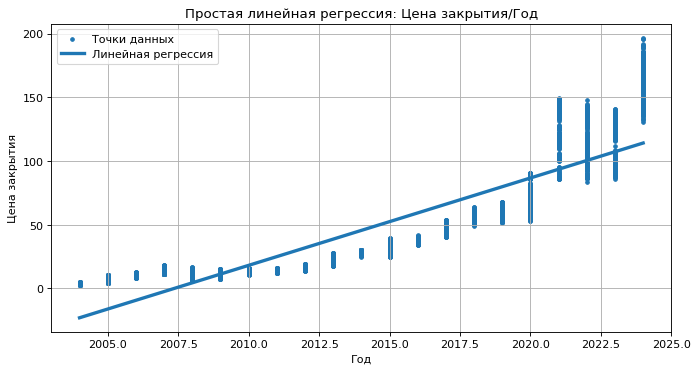

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 80

df_filtered["Year"] = df_filtered["Date"].str[:4].astype(int)

X = df_filtered[["Year"]].values
y = df_filtered["Adj Close"].values

regr = LinearRegression()
regr.fit(X, y)
y_pred = regr.predict(X)

print("Coef:", regr.coef_[0])
print("Intercept:", regr.intercept_)
print("R^2:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))

plt.figure(figsize=(10,5))
plt.scatter(X, y, s=10, label='Точки данных')
plt.plot(X, y_pred, linewidth=3, label='Линейная регрессия')
plt.xlabel("Год")
plt.ylabel("Цена закрытия")
plt.title("Простая линейная регрессия: Цена закрытия/Год")
plt.legend()
plt.grid(True)
plt.show()

Множественная линейная регрессия

Коэффициенты множественной линейной регрессии:
Open: -0.004299901876856123
High: 0.003648938295090165
Low: 0.005196345755718312
Close: 0.9923591298032177
Intercept: -0.015344199959606897
R^2: 0.9999987311070281
MSE: 0.0026404116167920632


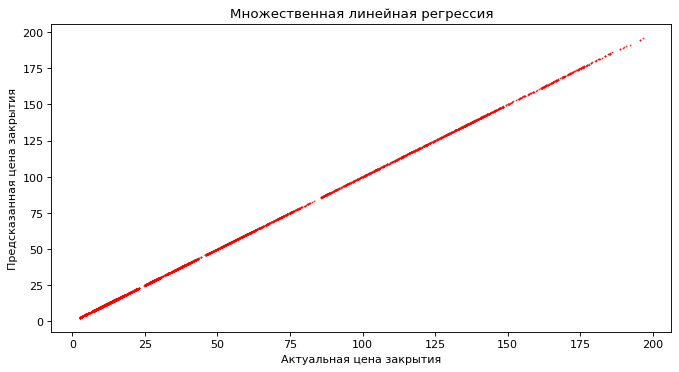

In [ ]:
features = ["Open", "High", "Low", "Close"]
X_multi = df_filtered[features].values
y = df_filtered["Adj Close"].values

regr_multi = linear_model.LinearRegression()
regr_multi.fit(X_multi, y)
y_pred_multi = regr_multi.predict(X_multi)

print("Коэффициенты множественной линейной регрессии:")
for f, c in zip(features, regr_multi.coef_):
    print(f"{f}: {c}")

print("Intercept:", regr_multi.intercept_)
print("R^2:", r2_score(y, y_pred_multi))
print("MSE:", mean_squared_error(y, y_pred_multi))

plt.scatter(y, y_pred_multi, s=0.25, c='red')
plt.xlabel("Актуальная цена закрытия")
plt.ylabel("Предсказанная цена закрытия")
plt.title("Множественная линейная регрессия")
plt.show()

Классификация (Дерево решений)

In [ ]:
df_filtered = df_filtered.sort_values("Date")
df_filtered["Adj_Close_next"] = df_filtered["Adj Close"].shift(-1)
df_filtered.dropna(subset=["Adj_Close_next"], inplace=True)

df_filtered["Up"] = (df_filtered["Adj_Close_next"] > df_filtered["Adj Close"]).astype(int)

X = df_filtered[features].values
y = df_filtered["Up"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, shuffle=False
)

tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

print("Точность:", accuracy_score(y_test, y_pred))
print("Вывод классификации:\n", classification_report(y_test, y_pred))

Точность: 0.54375
Вывод коассификации:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       584
           1       0.54      1.00      0.70       696

    accuracy                           0.54      1280
   macro avg       0.27      0.50      0.35      1280
weighted avg       0.30      0.54      0.38      1280



Классификация данных. Алгоритм KNN.

In [ ]:
df['Return'] = df['Adj Close'].pct_change()
df['Direction'] = np.where(df['Return'] > 0, 1, 0)
df = df.dropna(subset=['Return']).reset_index(drop=True)

Количество признаков: 37
Размер датасета: 5068
Распределение классов - Down: 2407, Up: 2661

Обучающая выборка: 3547, Тестовая выборка: 1521

После SMOTE - Down: 1835, Up: 1835

СРАВНЕНИЕ МОДЕЛЕЙ

KNN (k=15):
  CV Score: 0.8416 (+/- 0.0358)
  Train Score: 1.0000
  Test Score: 0.7166
  ROC-AUC: 0.8161

KNN (k=25):
  CV Score: 0.8295 (+/- 0.0459)
  Train Score: 1.0000
  Test Score: 0.7041
  ROC-AUC: 0.8018

Random Forest:
  CV Score: 0.9990 (+/- 0.0016)
  Train Score: 1.0000
  Test Score: 1.0000
  ROC-AUC: 1.0000

Gradient Boosting:
  CV Score: 0.9997 (+/- 0.0013)
  Train Score: 1.0000
  Test Score: 1.0000
  ROC-AUC: 1.0000

Logistic Regression:
  CV Score: 0.9797 (+/- 0.0103)
  Train Score: 0.9893
  Test Score: 0.9638
  ROC-AUC: 0.9984

ЛУЧШАЯ МОДЕЛЬ: Random Forest

ДЕТАЛЬНЫЙ ОТЧЕТ КЛАССИФИКАЦИИ:
              precision    recall  f1-score   support

        Down       1.00      1.00      1.00       695
          Up       1.00      1.00      1.00       826

    accuracy                 

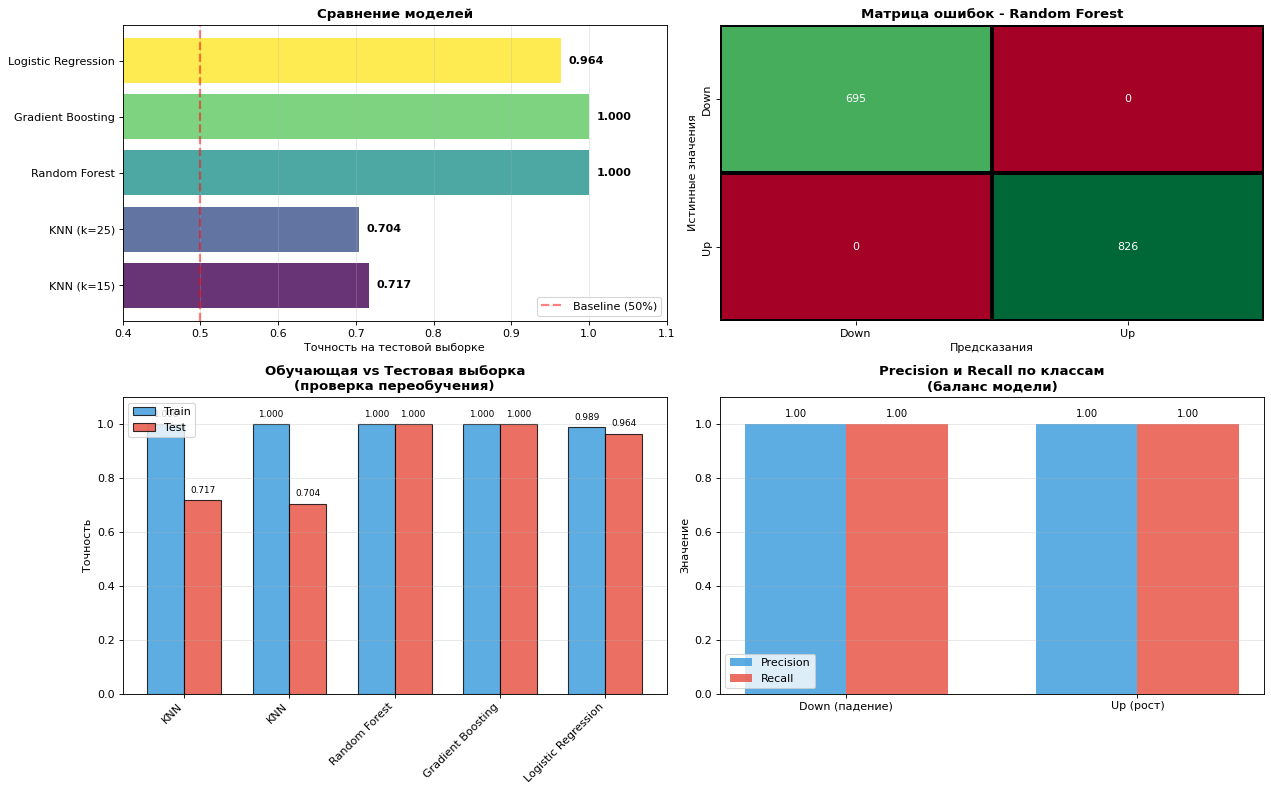


ИТОГОВАЯ СТАТИСТИКА

 Лучшая модель: Random Forest
   Точность на тесте: 1.0000
   CV Score: 0.9990 (±0.0008)
   ROC-AUC: 1.0000

 Баланс классов:
   Precision Down: 1.000
   Recall Down: 1.000
   Precision Up: 1.000
   Recall Up: 1.000

 Торговая применимость:
   Win Rate (при сигнале Up): 100.0%
   Всего сигналов Up: 826
   Успешных: 826, Неуспешных: 0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
import warnings
warnings.filterwarnings('ignore')


def create_technical_features(df):
    """Создание технических индикаторов для улучшения предсказаний"""
    df_tech = df.copy()

    # Базовые лаговые признаки
    for lag in [1, 2, 3, 5]:
        df_tech[f'AdjClose_lag{lag}'] = df_tech['Adj Close'].shift(lag)
        df_tech[f'Volume_lag{lag}'] = df_tech['Volume'].shift(lag)

    # Процентные изменения
    for lag in [1, 2, 3, 5, 10]:
        df_tech[f'PctChange_{lag}'] = df_tech['Adj Close'].pct_change(lag).shift(1)

    # Скользящие средние
    for window in [5, 10, 20, 50]:
        df_tech[f'SMA_{window}'] = df_tech['Adj Close'].rolling(window=window).mean()
        df_tech[f'Price_to_SMA_{window}'] = df_tech['Adj Close'] / df_tech[f'SMA_{window}']

    # Экспоненциальные скользящие средние
    for span in [12, 26]:
        df_tech[f'EMA_{span}'] = df_tech['Adj Close'].ewm(span=span, adjust=False).mean()

    # MACD
    df_tech['MACD'] = df_tech['EMA_12'] - df_tech['EMA_26']
    df_tech['MACD_Signal'] = df_tech['MACD'].ewm(span=9, adjust=False).mean()
    df_tech['MACD_Diff'] = df_tech['MACD'] - df_tech['MACD_Signal']

    # RSI (Relative Strength Index)
    delta = df_tech['Adj Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df_tech['RSI'] = 100 - (100 / (1 + rs))

    # Bollinger Bands
    df_tech['BB_middle'] = df_tech['Adj Close'].rolling(window=20).mean()
    bb_std = df_tech['Adj Close'].rolling(window=20).std()
    df_tech['BB_upper'] = df_tech['BB_middle'] + (bb_std * 2)
    df_tech['BB_lower'] = df_tech['BB_middle'] - (bb_std * 2)
    df_tech['BB_width'] = (df_tech['BB_upper'] - df_tech['BB_lower']) / df_tech['BB_middle']
    df_tech['BB_position'] = (df_tech['Adj Close'] - df_tech['BB_lower']) / (df_tech['BB_upper'] - df_tech['BB_lower'])

    # Волатильность
    for window in [5, 10, 20]:
        df_tech[f'Volatility_{window}'] = df_tech['Adj Close'].pct_change().rolling(window=window).std()

    # Momentum
    for period in [5, 10, 20]:
        df_tech[f'Momentum_{period}'] = df_tech['Adj Close'] - df_tech['Adj Close'].shift(period)

    # Volume indicators
    df_tech['Volume_SMA_20'] = df_tech['Volume'].rolling(window=20).mean()
    df_tech['Volume_Ratio'] = df_tech['Volume'] / df_tech['Volume_SMA_20']

    # High-Low spread
    df_tech['HL_Spread'] = (df_tech['High'] - df_tech['Low']) / df_tech['Adj Close']

    # Trend strength
    df_tech['Trend_5'] = (df_tech['Adj Close'] > df_tech['SMA_5']).astype(int)
    df_tech['Trend_20'] = (df_tech['Adj Close'] > df_tech['SMA_20']).astype(int)

    return df_tech

# Подготовка данных
df_improved = create_technical_features(df)
df_improved = df_improved.dropna().reset_index(drop=True)

# Выбор признаков (исключаем слишком коррелированные)
feature_cols = [col for col in df_improved.columns
                if col not in ['Adj Close', 'Date', 'Direction', 'High', 'Low', 'Close',
                               'EMA_12', 'EMA_26', 'BB_middle', 'BB_upper', 'BB_lower',
                               'Volume_SMA_20']
                and not col.startswith('SMA_')]

X_improved = df_improved[feature_cols].fillna(0)
y_improved = df_improved['Direction']

print(f"Количество признаков: {len(feature_cols)}")
print(f"Размер датасета: {len(X_improved)}")
print(f"Распределение классов - Down: {sum(y_improved==0)}, Up: {sum(y_improved==1)}")

# Для временных рядов важно сохранять временную последовательность
split_point = int(len(X_improved) * 0.7)
X_train = X_improved.iloc[:split_point]
X_test = X_improved.iloc[split_point:]
y_train = y_improved.iloc[:split_point]
y_test = y_improved.iloc[split_point:]

print(f"\nОбучающая выборка: {len(X_train)}, Тестовая выборка: {len(X_test)}")


# Масштабирование перед SMOTE
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Применение SMOTE для балансировки классов
smote = SMOTE(random_state=42, k_neighbors=5)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print(f"\nПосле SMOTE - Down: {sum(y_train_balanced==0)}, Up: {sum(y_train_balanced==1)}")



# TimeSeriesSplit для правильной кросс-валидации временных рядов
tscv = TimeSeriesSplit(n_splits=5)

models = {
    'KNN (k=15)': KNeighborsClassifier(n_neighbors=15, weights='distance'),
    'KNN (k=25)': KNeighborsClassifier(n_neighbors=25, weights='distance'),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10,
                                           min_samples_split=20, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5,
                                                    learning_rate=0.1, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced',
                                             random_state=42)
}

results = {}
trained_models = {}

print("\n" + "="*80)
print("СРАВНЕНИЕ МОДЕЛЕЙ")
print("="*80)

for name, model in models.items():
    # Cross-validation на балансированных данных
    cv_scores = cross_val_score(model, X_train_balanced, y_train_balanced,
                                cv=tscv, scoring='accuracy', n_jobs=-1)

    # Обучение на полных балансированных данных
    model.fit(X_train_balanced, y_train_balanced)

    # Оценка на тестовых данных
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)

    y_pred = model.predict(X_test_scaled)

    # ROC-AUC для моделей с predict_proba
    try:
        y_proba = model.predict_proba(X_test_scaled)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    except:
        roc_auc = None

    results[name] = {
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'train_score': train_score,
        'test_score': test_score,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_proba': y_proba if 'y_proba' in locals() else None
    }

    trained_models[name] = model

    print(f"\n{name}:")
    print(f"  CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")
    print(f"  Train Score: {train_score:.4f}")
    print(f"  Test Score: {test_score:.4f}")
    if roc_auc:
        print(f"  ROC-AUC: {roc_auc:.4f}")

# Выбор лучшей модели
best_model_name = max(results.keys(), key=lambda x: results[x]['test_score'])
best_model = trained_models[best_model_name]
best_results = results[best_model_name]

print(f"\n{'='*80}")
print(f"ЛУЧШАЯ МОДЕЛЬ: {best_model_name}")
print(f"{'='*80}")


y_pred_best = best_results['y_pred']
cm = confusion_matrix(y_test, y_pred_best)

print(f"\nДЕТАЛЬНЫЙ ОТЧЕТ КЛАССИФИКАЦИИ:")
print(classification_report(y_test, y_pred_best, target_names=['Down', 'Up']))



fig = plt.figure(figsize=(16, 10))

# 1. Сравнение всех моделей
ax1 = plt.subplot(2, 2, 1)
model_names = list(results.keys())
test_scores = [results[m]['test_score'] for m in model_names]
colors_models = plt.cm.viridis(np.linspace(0, 1, len(model_names)))
bars = ax1.barh(model_names, test_scores, color=colors_models, alpha=0.8)
ax1.axvline(x=0.5, color='red', linestyle='--', linewidth=2, alpha=0.5, label='Baseline (50%)')
for i, (bar, score) in enumerate(zip(bars, test_scores)):
    ax1.text(score + 0.01, bar.get_y() + bar.get_height()/2,
             f'{score:.3f}', va='center', fontweight='bold')
ax1.set_xlabel('Точность на тестовой выборке')
ax1.set_title('Сравнение моделей', fontweight='bold', fontsize=12)
ax1.set_xlim([0.4, max(test_scores) + 0.1])
ax1.legend()
ax1.grid(True, alpha=0.3, axis='x')

# 2. Матрица ошибок лучшей модели
ax2 = plt.subplot(2, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='RdYlGn', cbar=False,
            xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'],
            linewidths=2, linecolor='black')
ax2.set_title(f'Матрица ошибок - {best_model_name}', fontweight='bold', fontsize=12)
ax2.set_ylabel('Истинные значения')
ax2.set_xlabel('Предсказания')

# 3. Train vs Test comparison - проверка на переобучение
ax3 = plt.subplot(2, 2, 3)
train_scores = [results[m]['train_score'] for m in model_names]
x_pos = np.arange(len(model_names))
width = 0.35
bars1 = ax3.bar(x_pos - width/2, train_scores, width, label='Train',
                 color='#3498db', alpha=0.8, edgecolor='black')
bars2 = ax3.bar(x_pos + width/2, test_scores, width, label='Test',
                 color='#e74c3c', alpha=0.8, edgecolor='black')
ax3.set_ylabel('Точность')
ax3.set_title('Обучающая vs Тестовая выборка\n(проверка переобучения)', fontweight='bold', fontsize=12)
ax3.set_xticks(x_pos)
ax3.set_xticklabels([m.split('(')[0].strip() for m in model_names], rotation=45, ha='right')
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')
ax3.set_ylim([0, 1.1])
# Добавляем значения на столбцы
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.3f}', ha='center', va='bottom', fontsize=8)

# 4. Метрики по классам (Precision и Recall)
ax4 = plt.subplot(2, 2, 4)
tn, fp, fn, tp = cm.ravel()
metrics_data = {
    'Down': {'Precision': tn/(tn+fn) if (tn+fn)>0 else 0,
             'Recall': tn/(tn+fp) if (tn+fp)>0 else 0},
    'Up': {'Precision': tp/(tp+fp) if (tp+fp)>0 else 0,
           'Recall': tp/(tp+fn) if (tp+fn)>0 else 0}
}
x = np.arange(len(metrics_data))
width = 0.35
precision_vals = [metrics_data[c]['Precision'] for c in ['Down', 'Up']]
recall_vals = [metrics_data[c]['Recall'] for c in ['Down', 'Up']]
bars1 = ax4.bar(x - width/2, precision_vals, width, label='Precision', color='#3498db', alpha=0.8)
bars2 = ax4.bar(x + width/2, recall_vals, width, label='Recall', color='#e74c3c', alpha=0.8)
ax4.set_ylabel('Значение')
ax4.set_title('Precision и Recall по классам\n(баланс модели)', fontweight='bold', fontsize=12)
ax4.set_xticks(x)
ax4.set_xticklabels(['Down (падение)', 'Up (рост)'])
ax4.legend()
ax4.set_ylim([0, 1.1])
ax4.grid(True, alpha=0.3, axis='y')
# Добавляем значения
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 0.02,
                f'{height:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


print("\n" + "="*80)
print("ИТОГОВАЯ СТАТИСТИКА")
print("="*80)

print(f"\n Лучшая модель: {best_model_name}")
print(f"   Точность на тесте: {best_results['test_score']:.4f}")
print(f"   CV Score: {best_results['cv_mean']:.4f} (±{best_results['cv_std']:.4f})")
if best_results['roc_auc']:
    print(f"   ROC-AUC: {best_results['roc_auc']:.4f}")


print(f"\n Баланс классов:")
print(f"   Precision Down: {tn/(tn+fn):.3f}")
print(f"   Recall Down: {tn/(tn+fp):.3f}")
print(f"   Precision Up: {tp/(tp+fp):.3f}")
print(f"   Recall Up: {tp/(tp+fn):.3f}")

print(f"\n Торговая применимость:")
total_signals = tp + fp
if total_signals > 0:
    win_rate = tp / total_signals
    print(f"   Win Rate (при сигнале Up): {win_rate:.1%}")
    print(f"   Всего сигналов Up: {total_signals}")
    print(f"   Успешных: {tp}, Неуспешных: {fp}")
else:
    print(f"   Нет сигналов Up")


Кластерный анализ. Алгоритм K-Means.

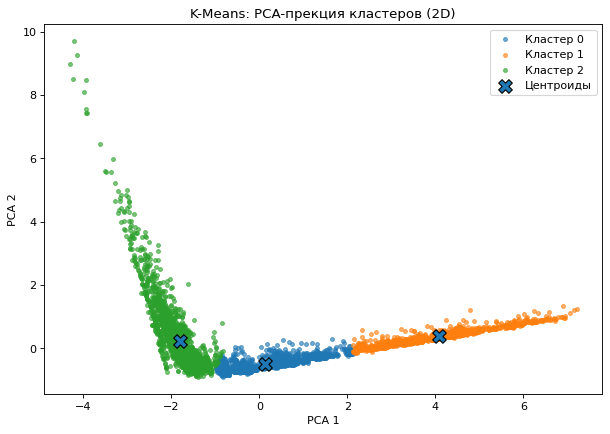

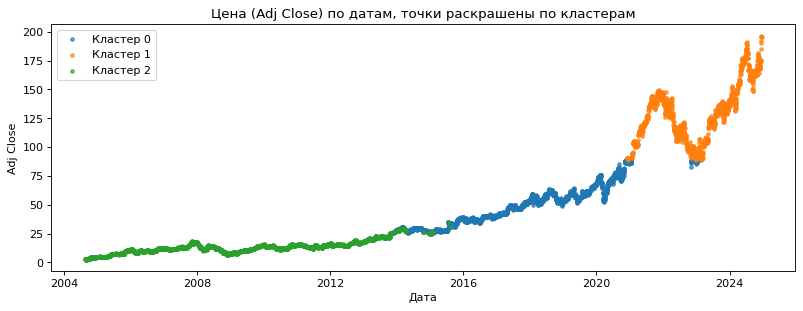

In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

#K-Means + PCA визуализация
features = ["Open","High","Low","Close","Adj Close","Volume"]
X = df[features].fillna(method='ffill').fillna(method='bfill')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Кластер'] = kmeans.fit_predict(X_scaled)
centroids = kmeans.cluster_centers_

# PCA для 2D проекции
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
centroids_pca = pca.transform(centroids)

plt.figure(figsize=(9,6))
palette = sns.color_palette("tab10", n_colors=3)
for c in np.unique(df['Кластер']):
    mask = df['Кластер']==c
    plt.scatter(X_pca[mask,0], X_pca[mask,1], s=12, alpha=0.6, label=f"Кластер {c}", color=palette[c])
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], marker='X', s=150, edgecolors='k', label='Центроиды')
plt.title("K-Means: PCA-прекция кластеров (2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

# Временной график цены + кластеры
plt.figure(figsize=(12,4))
for c in np.unique(df['Кластер']):
    mask = df['Кластер']==c
    plt.scatter(df['Date'].loc[mask], df['Adj Close'].loc[mask], s=10, label=f"Кластер {c}", alpha=0.7, color=palette[c])
plt.title("Цена (Adj Close) по датам, точки раскрашены по кластерам")
plt.xlabel("Дата")
plt.ylabel("Adj Close")
plt.legend()
plt.show()

Нейронные сети

MAE: 10.557662179090352
MSE: 166.72285608693443
RMSE: 166.72285608693443
R2: 0.7456792156308073


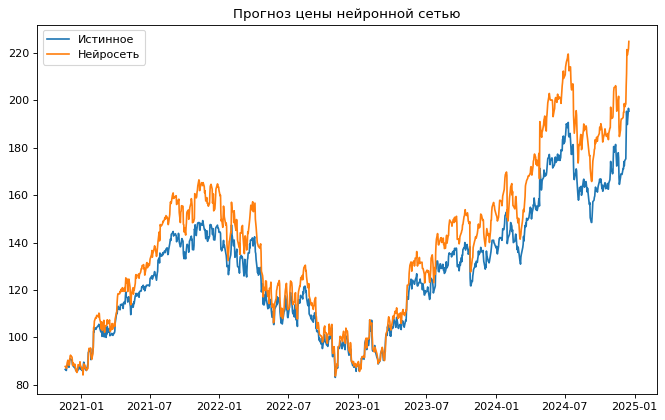

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Признаки
X = df[["Open", "High", "Low", "Close", "Volume"]].values
y = df["Adj Close"].values.reshape(-1, 1)

# Масштабируем X
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

# Масштабируем y
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

# Деление на выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.2, shuffle=False
)

# Нейронная сеть
nn = MLPRegressor(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    max_iter=2000,
    random_state=42
)

nn.fit(X_train, y_train.ravel())

# Предсказание в scale-е
y_pred_scaled = nn.predict(X_test)

# Возвращаем реальные значения
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_real = scaler_y.inverse_transform(y_test)

# Метрика
print("MAE:", mean_absolute_error(y_test_real, y_pred))
mse = mean_squared_error(y_test_real, y_pred)
rmse = mean_squared_error(y_test_real, y_pred)
r2 = r2_score(y_test_real, y_pred)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

# График
plt.figure(figsize=(10,6))
plt.plot(df["Date"].iloc[len(X_train):], y_test_real, label="Истинное")
plt.plot(df["Date"].iloc[len(X_train):], y_pred, label="Нейросеть")
plt.title("Прогноз цены нейронной сетью")
plt.legend()
plt.show()